Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Room Condition (Multivariate Time Series Data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## About the Data

* Download the data from https://www.kaggle.com/robmarkcole/occupancy-detection-data-set-uci?select=datatraining.txt#
  * The data was created to predict room occupacy in Kaggle, so "Occupancy" was the label
  * But the whole dataset can also serve as multivariate timeseries data, and "Occupancy" is no longer the only label

In [6]:
room_condition_df = pd.read_csv('room_condition.csv', parse_dates=['date'])
room_condition_df = room_condition_df.sort_values(by='date')

print(room_condition_df.shape)
room_condition_df.head()

(8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
print(room_condition_df['Occupancy'].value_counts())

0    6414
1    1729
Name: Occupancy, dtype: int64


In [12]:
print(room_condition_df['date'].dt.date.value_counts())

2015-02-05    1440
2015-02-06    1440
2015-02-07    1440
2015-02-08    1440
2015-02-09    1440
2015-02-10     574
2015-02-04     369
Name: date, dtype: int64


In [37]:
def plot_multi_ts(df, time_col):
    fig, ax = plt.subplots(figsize=(20,40), nrows=df.shape[1]-1, ncols=1)
    
    for i in range(len(df.columns)):
        col = df.columns[i]
        if col == time_col:
            continue
        tmp_fig = df.plot(x=time_col, y=col, color='blue', ax=ax[i-1])
        
    plt.show()

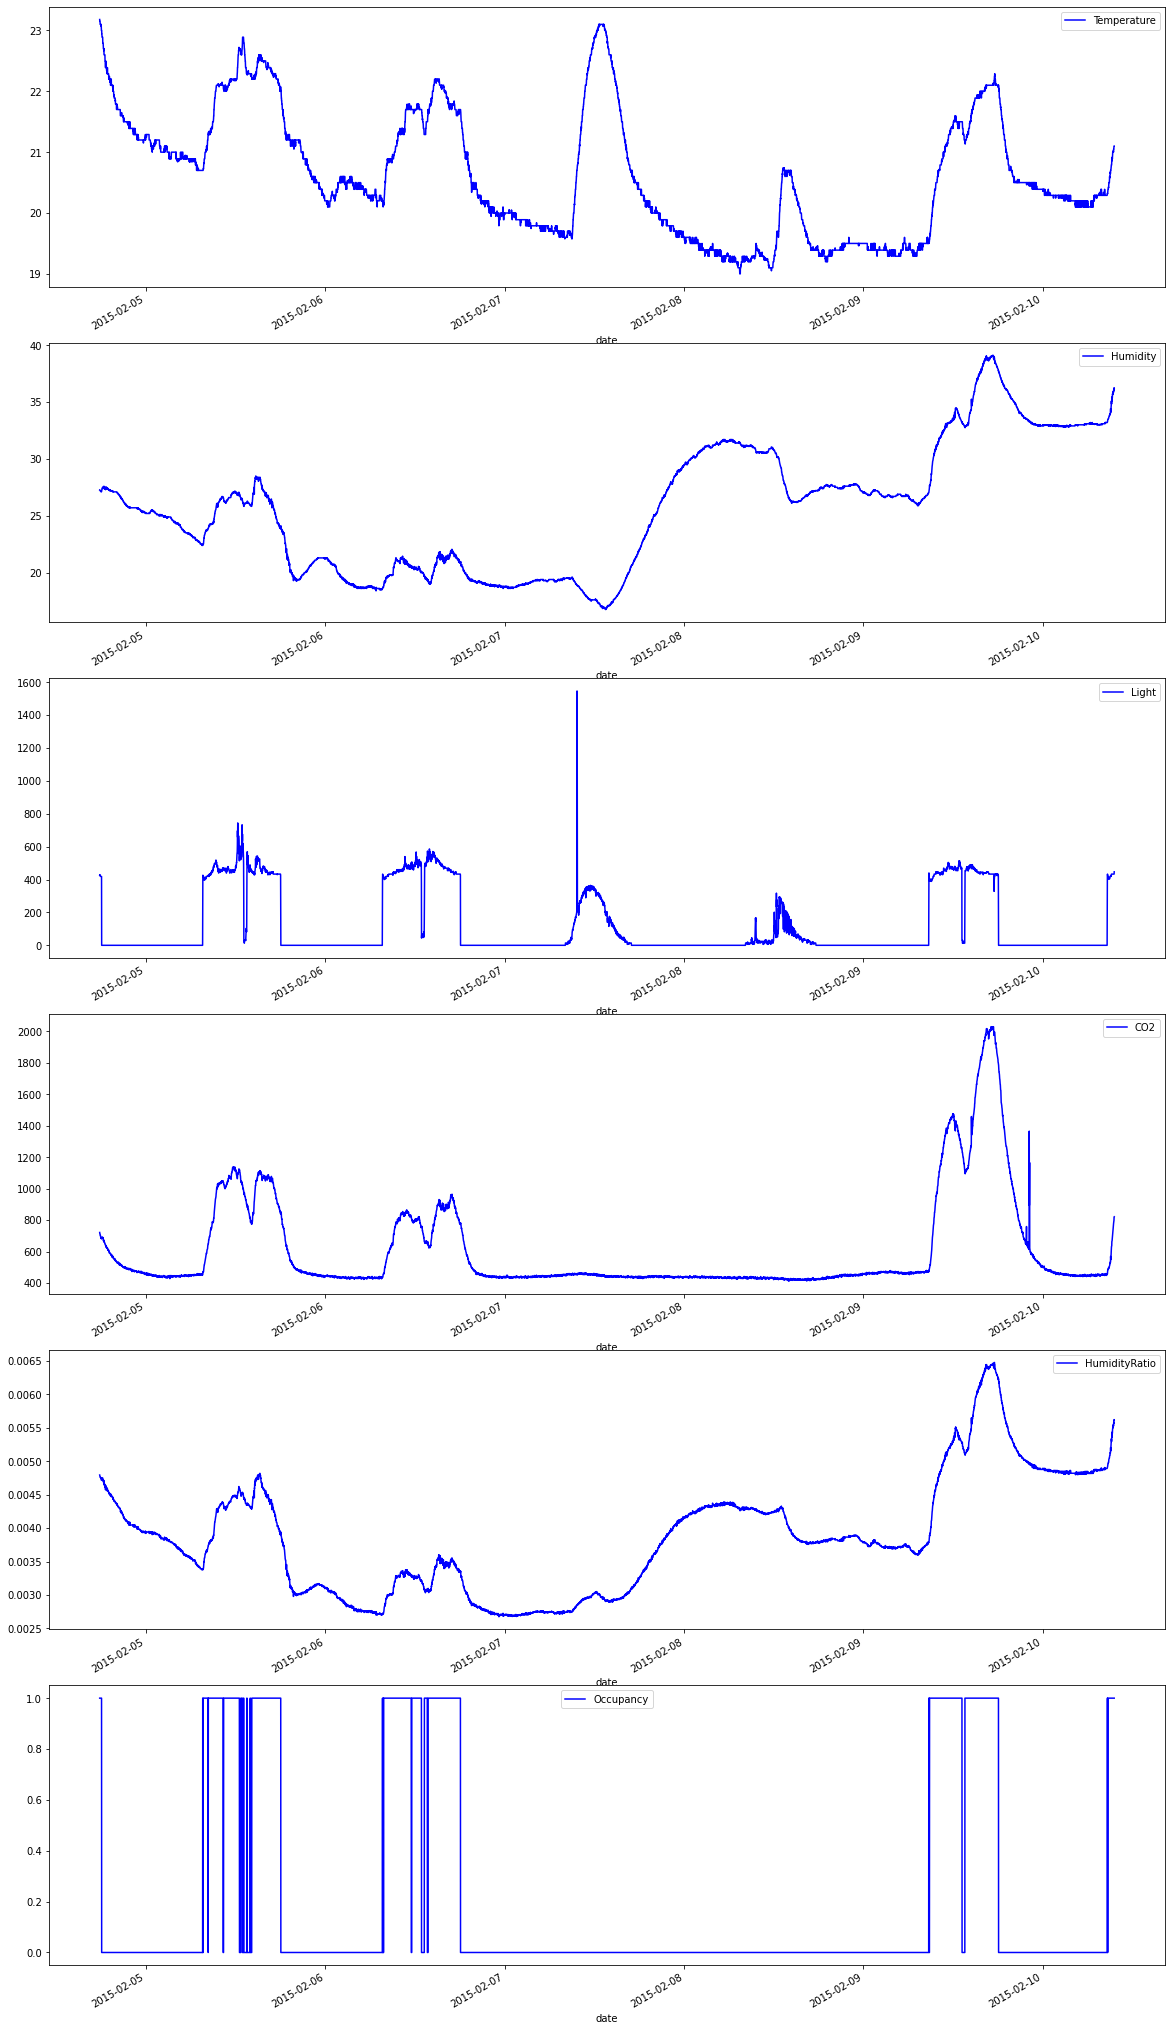

In [38]:
plot_multi_ts(room_condition_df, time_col='date')

In [39]:
room_condition_df = room_condition_df.set_index('date')

room_condition_df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [40]:
room_condition_df.to_pickle('structured_data/multivar_ts.pkl')